# Aggregations: Min, Max, and Everything In Between

When faced with large amounts of data, summary statistics are useful to first calculate:

Mean

Standard Deviation

As well as the sum, product, median, min, max etc...

## Summing the Values in an Array

Consider computing the sum of all values in an array. *Python* itself can do this using the built-in `sum` function

In [2]:
import numpy as np

In [4]:
L = np.random.random(100)
print(L)
sum(L)

[0.05451258 0.73963801 0.79283907 0.86495928 0.40602396 0.24717099
 0.50696339 0.37790335 0.26059431 0.26520886 0.62221885 0.70270368
 0.82902294 0.08296185 0.52634969 0.65528429 0.73229685 0.42081283
 0.06438589 0.95612846 0.11389045 0.03271657 0.95925563 0.65834189
 0.41740192 0.95973396 0.60379749 0.66874065 0.99587083 0.23223801
 0.68976558 0.19527977 0.12406456 0.34903962 0.81036777 0.85973415
 0.40429607 0.07751788 0.3369737  0.9137788  0.73355766 0.92197648
 0.21556644 0.79152042 0.67003933 0.01237313 0.11327925 0.90883193
 0.95042268 0.42011742 0.86395441 0.25272027 0.07477876 0.65352783
 0.67421576 0.26051703 0.56990528 0.57452554 0.8712246  0.52319546
 0.61250852 0.67053544 0.76203183 0.74990472 0.23171321 0.24489219
 0.13888562 0.5277702  0.70274495 0.11411918 0.79862296 0.84708734
 0.0796901  0.84686348 0.98243088 0.12589827 0.08063409 0.04451294
 0.12743527 0.57426068 0.76812053 0.58163125 0.51916779 0.1703726
 0.13875902 0.97959681 0.76770363 0.27393358 0.08054447 0.48226

49.55077104598703

In [5]:
# similar to NumPy's syntax

np.sum(L)

49.55077104598705

However, because it executes the operation in compiled code, NumPy's version of the operation is computed much more quickly:

In [6]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

118 ms ± 37.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
356 µs ± 14 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Minimum and Maximum

*Python* has built-in min and max functions, used to find the minimum value and maximum value of any given array:

In [ ]:
%timeit min(big_array), max(big_array)

103 ms ± 1.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%timeit np.min(big_array), np.max(big_array)

639 µs ± 15 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
np.min(big_array), np.max(big_array)

(4.1686295648712957e-07, 0.9999994442229705)

In [ ]:
# more convenient syntax in NumPy

print(big_array.min(), big_array.max(), big_array.sum())

4.1686295648712957e-07 0.9999994442229705 499517.29297183896


## Multi dimensional aggregates

One common type of aggregation operation is an aggregate along a row or column e.g:

In [7]:
M = np.random.random((3, 4))
print(M)

[[0.23737918 0.27514397 0.44314142 0.15451563]
 [0.17571064 0.23781684 0.48957614 0.50370766]
 [0.28052772 0.69851763 0.33382118 0.2574676 ]]


In [ ]:
# By default, each NumPy aggregation function will return aggregate over entire array
M.sum()

6.4964422826160835

Aggregation functions take an additional argument specifying the axis along which the aggregate is computed.

For example, we can find the minimum value within each column by specifying `axis=0`:

In [ ]:
M

array([[0.38844424, 0.29072675, 0.47636944, 0.99543197],
       [0.05144082, 0.30831012, 0.5990638 , 0.43362003],
       [0.36671009, 0.98280113, 0.61653999, 0.98698389]])

In [ ]:
M.min(axis=0)  # row

array([0.05144082, 0.29072675, 0.47636944, 0.43362003])

In [ ]:
M.max(axis=1)  # column

array([0.99543197, 0.5990638 , 0.98698389])

### Other aggregation functions

The following table provides a list of useful aggregation functions available in NumPy:

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |

In [23]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [24]:
np.sum(x)

45

In [37]:
n = np.array([1, 2, 3, np.nan])

print("Warning:")
print("\t", n)
print(np.sum(n))
print(np.nansum(n))

	 [ 1.  2.  3. nan]
nan
6.0


In [41]:
print(np.argmax(n))
print(np.nanargmax(n))

3
2


# Example: What is the average networth of the world's richest people?

Aggregates available in NumPy can be extremely useful for summarizing a set of values. As a simple example, let's consider the networth of the top 100 richest people.

In [ ]:
#csv from https://github.com/richard512/Little-Big-Data/blob/master/top100-richest-people.csv
!head -4 top100-richest-people.csv

rank,name,networthtext,networth,nationality,company,whattheydo,title,
1,Bill Gates,$86 Billion,86000000000,American,microsoft,tech conglomerate,Tech Founder of Microsoft,
2,Amancio Ortega Gaona,$71 Billion,71000000000,Spanish,inditex,fashion,"founding chairman of the Inditex fashion group, best known for its chain of Zara clothing and accessories retail shops",
3,Warren Buffett,$70.2 Billion,70200000000,American,berkshire hathaway,investing,"business magnate, investor and philanthropist",


In [ ]:
import pandas as pd
data = pd.read_csv('top100-richest-people.csv')
networth = np.array(data['networth'])
print(networth)

[86000000000 71000000000 70200000000 70000000000 68000000000 50000000000
 50000000000 48000000000 46000000000 43500000000 43000000000 42500000000
 41000000000 40000000000 38500000000 37200000000 37100000000 37100000000
 37000000000 36700000000 36500000000 36000000000 34000000000 30000000000
 30000000000 28900000000 28500000000 28050000000 26900000000 25900000000
 24400000000 24400000000 24400000000 23800000000 23400000000 23000000000
 23000000000 23000000000 22800000000 22500000000 21300000000 21200000000
 21000000000 21000000000 20100000000 20100000000 20000000000 20000000000
 20000000000 20000000000 19700000000 19600000000 19500000000 19400000000
 19300000000 19100000000 18200000000 18000000000 18000000000 17500000000
 17300000000 17300000000 17100000000 17100000000 16600000000 16500000000
 16200000000 16200000000 16200000000 15800000000 15700000000 15500000000
 15500000000 15500000000 15400000000 15200000000 15200000000 14900000000
 14800000000 14800000000 14700000000 14500000000 14

In [18]:
np.random.seed(100)
networth = np.random.normal(100, 75, 50)
networth

array([-31.23241048, 125.70103025, 186.47768519,  81.06729726,
       173.59905902, 138.5664131 , 116.58847519,  19.74675021,
        85.78781269, 119.12510832,  65.64797609, 132.63726161,
        56.23037123, 161.26353038, 150.45406043,  92.16916425,
        60.15397174, 177.22995139,  67.1398283 ,  16.12613153,
       221.42362455, 215.62038809,  81.10906456,  36.81731963,
       113.83890179, 170.28116508, 154.82502579, 202.11670939,
        75.53214556, 104.17570111, 116.67997064,  -8.24127464,
        43.27357708, 161.23405083, 156.28335712,  65.80398044,
       189.2216701 , -26.79626198,  -1.72992866,   7.56741146,
        59.16706287,  49.88711974, 100.54859224,  54.02959484,
       197.48110561, -29.98217177,  26.25174257, 126.81308149,
       -21.01838771, 210.30354   ])

In [13]:
print("Mean networth:       ", networth.mean())
print("Standard deviation:", networth.std())
print("Minimum networth:    ", networth.min())
print("Maximum networth:    ", networth.max())

Mean networth:        95.919929212605
Standard deviation: 94.12200492859391
Minimum networth:     -74.97654730546975
Maximum networth:     261.89816606752595


In [21]:
print("0th percentile:   ", np.percentile(networth, 0))
print("25th percentile:   ", np.percentile(networth, 25))
print("50th percentile:   ", np.percentile(networth, 50))
print("Median:            ", np.median(networth))
print("75th percentile:   ", np.percentile(networth, 75))
print("100th percentile:   ", np.percentile(networth, 100))

0th percentile:    -31.2324104791023
25th percentile:    50.92273851402914
50th percentile:    96.35887824393532
Median:             96.35887824393532
75th percentile:    155.9187742832002
100th percentile:    221.4236245506445


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style

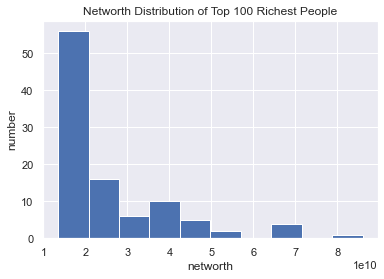

In [ ]:
plt.hist(networth)
plt.title('Networth Distribution of Top 100 Richest People')
plt.xlabel('networth')
plt.ylabel('number');

These aggregates are some of the fundamental pieces of exploratory data analysis.

You'll use this throughout this module, as well as the Data Science Group Project Module next semester.